# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [33]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


# 1.- LIMPIEZA DE DATOS
Buscar datos nulos en la base

In [34]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

Al parecer hay 2761 con valor nulo en el retraso de salida de 15 minutos (depdel15), este campo deberia tener 1 o 0 dependiendo del tiempo que tardo el vuelo en salir. Podemos inferir el dato analizando las 2761 entradas, filtrando aquellas que tengan un retraso de salida (depdelay) mayor a 15 para asignarle "1", o si es 15 o menos minutos asignarle "0", segun sea el caso. 

In [35]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


no me despliega todas las entradas por el tamaño, asi que graficamos para visualizar mejor

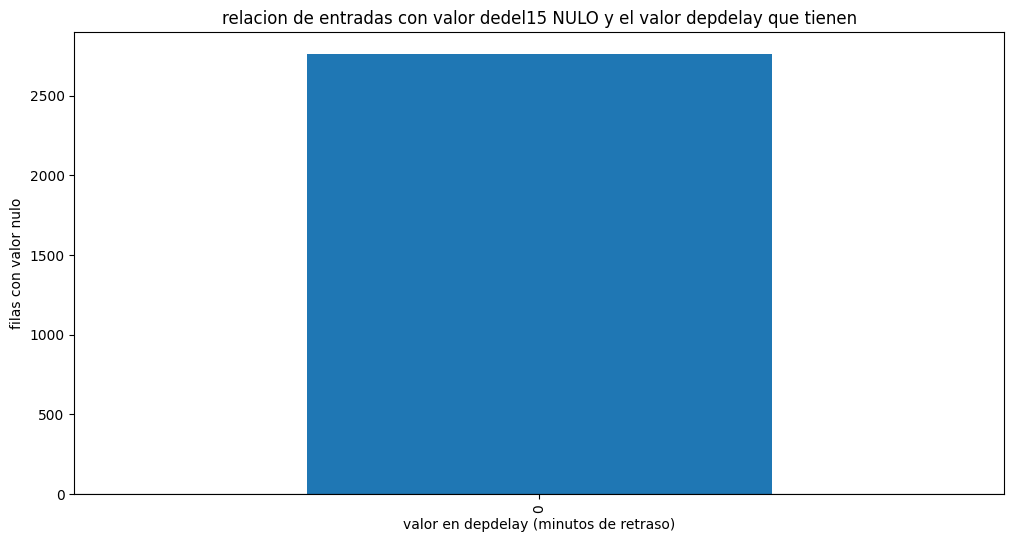

In [36]:
import matplotlib.pyplot as plt

counts = df_nulls['DepDelay'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('relacion de entradas con valor dedel15 NULO y el valor depdelay que tienen')
plt.xlabel('valor en depdelay (minutos de retraso)')
plt.ylabel('filas con valor nulo')
plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

vemos que TODAS las filas con depdel15 nulo ademas tienen caen en 0 cuando intentamos recuperar la cantidad de minutos que tardo. Por lo tanto deducimos que fue un defecto o falla en labase donde no se registro el valor, y al ver que no tiene retraso, convertimos todos los valores depel15 nulos a 0, pues el retraso es negativo

In [37]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Despues de confirmar que ninguna entrada tiene valores nulos, procedemos con la limpieza de los outliers o valores atipicos. Para eso identificamos y eliminamos los outliers de las columnas depdelay y arrdelay, pues son los datos que presentan casos aisaldos. (usamos cuartiles) y definimos los limites normales (esto es subjetivo, pero recortamos más eliminando porcentajes amplios)

In [38]:
Q1_dep = df_flights['DepDelay'].quantile(0.25)
Q3_dep = df_flights['DepDelay'].quantile(0.75)
IQR_dep = Q3_dep - Q1_dep
lower_bound_dep = Q1_dep - 1.5 * IQR_dep
upper_bound_dep = Q3_dep + 1.5 * IQR_dep

Q1_arr = df_flights['ArrDelay'].quantile(0.25)
Q3_arr = df_flights['ArrDelay'].quantile(0.75)
IQR_arr = Q3_arr - Q1_arr
lower_bound_arr = Q1_arr - 1.5 * IQR_arr
upper_bound_arr = Q3_arr + 1.5 * IQR_arr

df_cleaned = df_flights[(df_flights['DepDelay'] >= lower_bound_dep) & (df_flights['DepDelay'] <= upper_bound_dep) &
                         (df_flights['ArrDelay'] >= lower_bound_arr) & (df_flights['ArrDelay'] <= upper_bound_arr)]

summary_statistics = df_cleaned[['DepDelay', 'ArrDelay']].describe()
print(summary_statistics)

            DepDelay       ArrDelay
count  235067.000000  235067.000000
mean        0.373447      -4.029843
std         8.029744      12.959713
min       -23.000000     -42.000000
25%        -5.000000     -13.000000
50%        -2.000000      -5.000000
75%         3.000000       3.000000
max        28.000000      41.000000


# 2.- EXPLORACION DE LOS DATOS
Ya que procesamos la información para eliminar datos nulos, y eliminamos datos atipicos, vizualizamos la distribucion actualizada de depdelay y arrdelay y la informacion del resumen

In [39]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


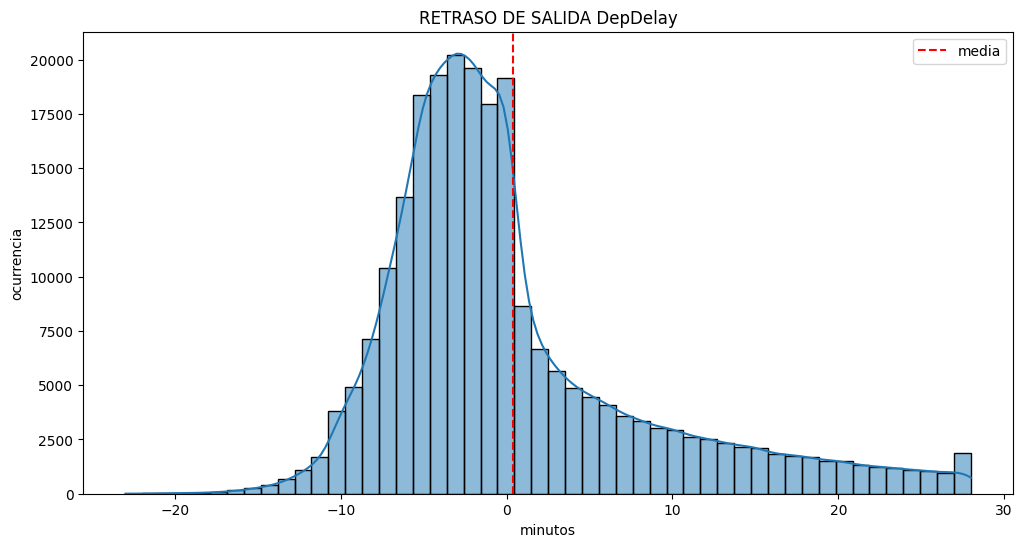

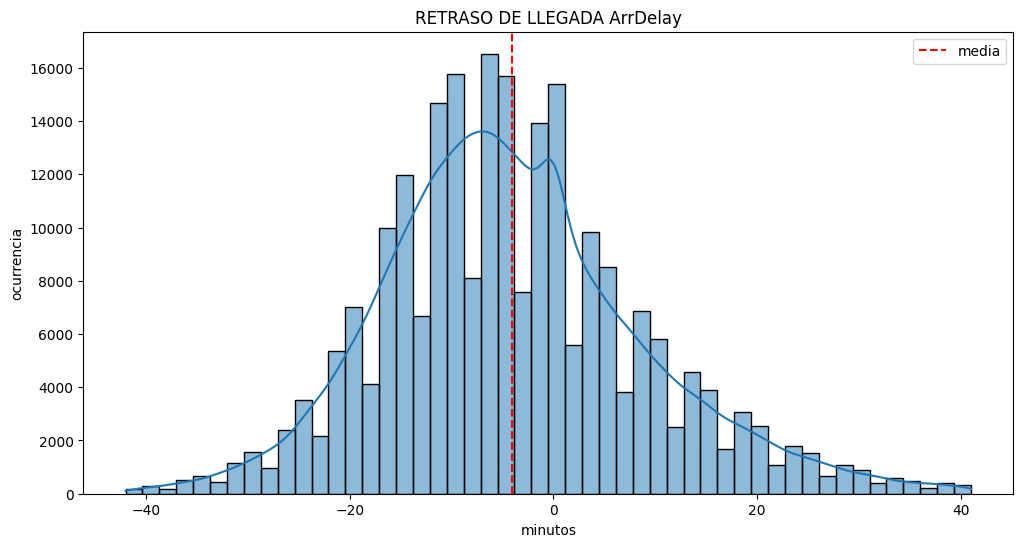

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['DepDelay'], bins=50, kde=True)
plt.title('RETRASO DE SALIDA DepDelay')
plt.xlabel('minutos')
plt.ylabel('ocurrencia')
plt.axvline(df_cleaned['DepDelay'].mean(), color='red', linestyle='--', label='media')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['ArrDelay'], bins=50, kde=True)
plt.title('RETRASO DE LLEGADA ArrDelay')
plt.xlabel('minutos')
plt.ylabel('ocurrencia')
plt.axvline(df_cleaned['ArrDelay'].mean(), color='red', linestyle='--', label='media')
plt.legend()
plt.show()


# PREGUNTAS

What are the average (mean) departure and arrival delays?

R= usando promedio de ambos tipos de retraso de los datos que ya limpiamos.

In [41]:
mean_dep_delay = df_cleaned['DepDelay'].mean()
mean_arr_delay = df_cleaned['ArrDelay'].mean()
mean_dep_delay, mean_arr_delay

(0.3734467194459452, -4.029842555526722)

How do the carriers compare in terms of arrival delay performance?

R= graficando el calculo del promedio de retraso que tiene cada aerolinea en arrdelay

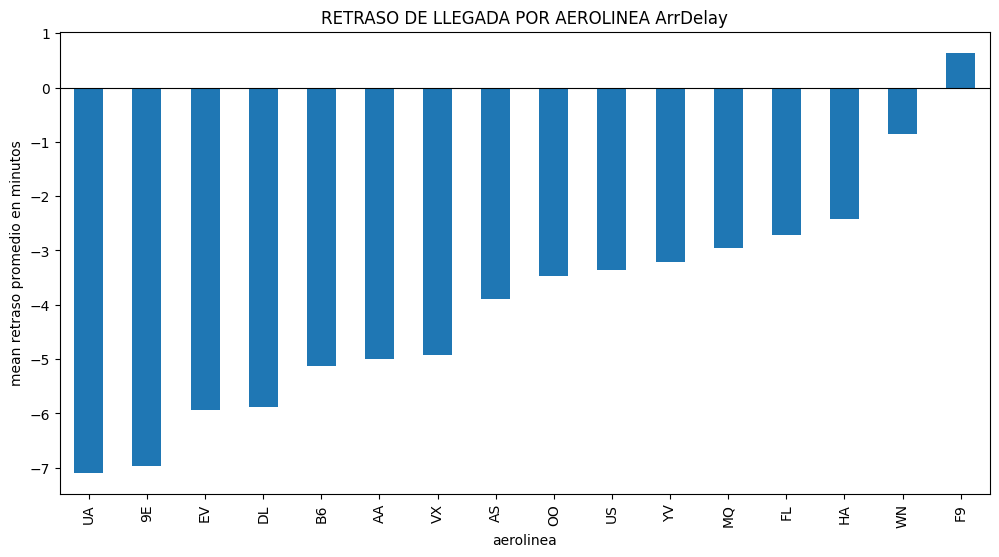

In [42]:
carrier_delay = df_cleaned.groupby('Carrier')['ArrDelay'].mean().sort_values()
plt.figure(figsize=(12, 6))
carrier_delay.plot(kind='bar')
plt.title('RETRASO DE LLEGADA POR AEROLINEA ArrDelay')
plt.xlabel('aerolinea')
plt.ylabel('mean retraso promedio en minutos')
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

Is there a noticable difference in arrival delays for different days of the week?

R= visualizando el promedio de retrasos segun el dia de la semana

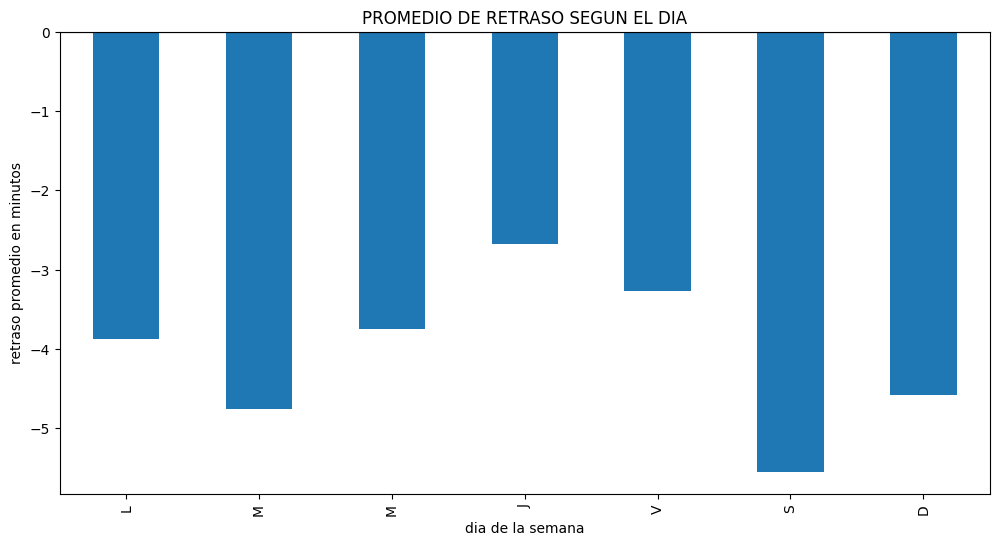

In [43]:
week_day_delay = df_cleaned.groupby('DayOfWeek')['ArrDelay'].mean()
plt.figure(figsize=(12, 6))
week_day_delay.plot(kind='bar')
plt.title('PROMEDIO DE RETRASO SEGUN EL DIA')
plt.xlabel('dia de la semana')
plt.ylabel('retraso promedio en minutos')
plt.xticks(ticks=range(7), labels=['L', 'M', 'M', 'J', 'V', 'S', 'D'], rotation=90)
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

Which departure airport has the highest average departure delay?

R= calulcando y visualizando el aeropuerto que presenta mayor retraso para salir. Chicago con casi 5min de retraso promedio

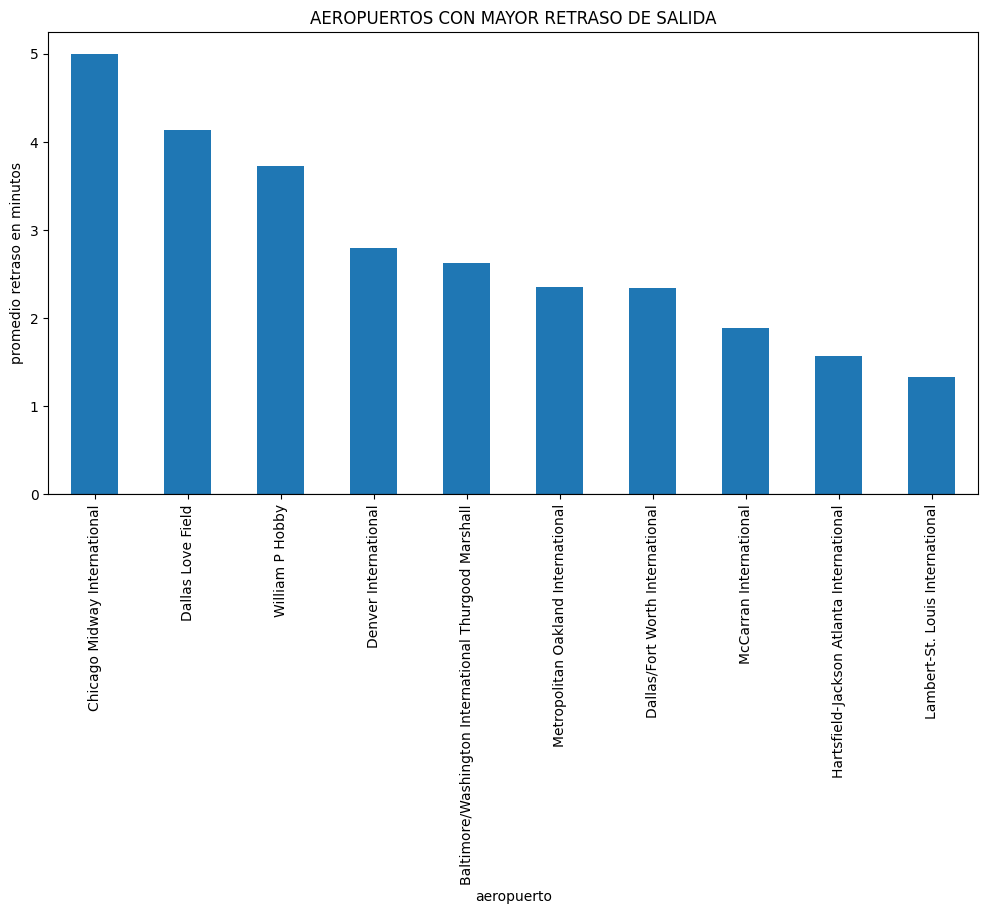

('Chicago Midway International', 4.995547860499629)

In [44]:
airport_delay = df_cleaned.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
airport_delay.head(10).plot(kind='bar')
plt.title('AEROPUERTOS CON MAYOR RETRASO DE SALIDA')
plt.xlabel('aeropuerto')
plt.ylabel('promedio retraso en minutos')
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()
top_airport = airport_delay.idxmax(), airport_delay.max()
top_airport

Do late departures tend to result in longer arrival delays than on-time departures?

R= Comparamos los retrasos de llegada de los vuelos que salieron a tiempo, contra los vuelos que salieron tarde y visualizamos los promedios. y descubrimos que en efecto, salir tarde hace que se llegue con retraso y salir puntualmente puede incluso generar que el vuelo llegue antes

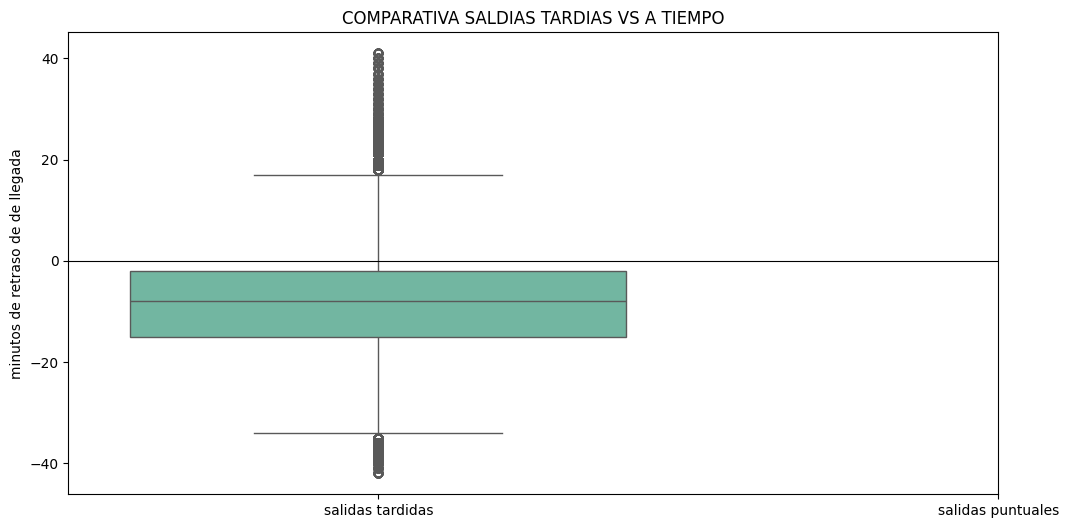

(4.310061520664633, -8.020113840057864)

In [45]:
delayed_departures = df_cleaned[df_cleaned['DepDelay'] > 0]['ArrDelay']
on_time_departures = df_cleaned[df_cleaned['DepDelay'] <= 0]['ArrDelay']
plt.figure(figsize=(12, 6))
sns.boxplot(data=[delayed_departures, on_time_departures], palette='Set2')
plt.title('COMPARATIVA SALDIAS TARDIAS VS A TIEMPO')
plt.xticks(ticks=[0, 1], labels=['salidas tardidas', 'salidas puntuales'])
plt.ylabel('minutos de retraso de de llegada')
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

delayed_mean = delayed_departures.mean()
on_time_mean = on_time_departures.mean()
delayed_mean, on_time_mean


Which route (from origin airport to destination airport) has the most late arrivals?

R= encontrando la ruta entre aeropuertos que presenta mayor incidencia en llegadas tardias (por mas de 15 minutos en su ruta). Determinamos cual es la ruta de origen a destino que presenta retrasos con mayor FRECUENCIA. enocntramos que es de SF a LA con mas de 120 retrasos en el periodo analizado.

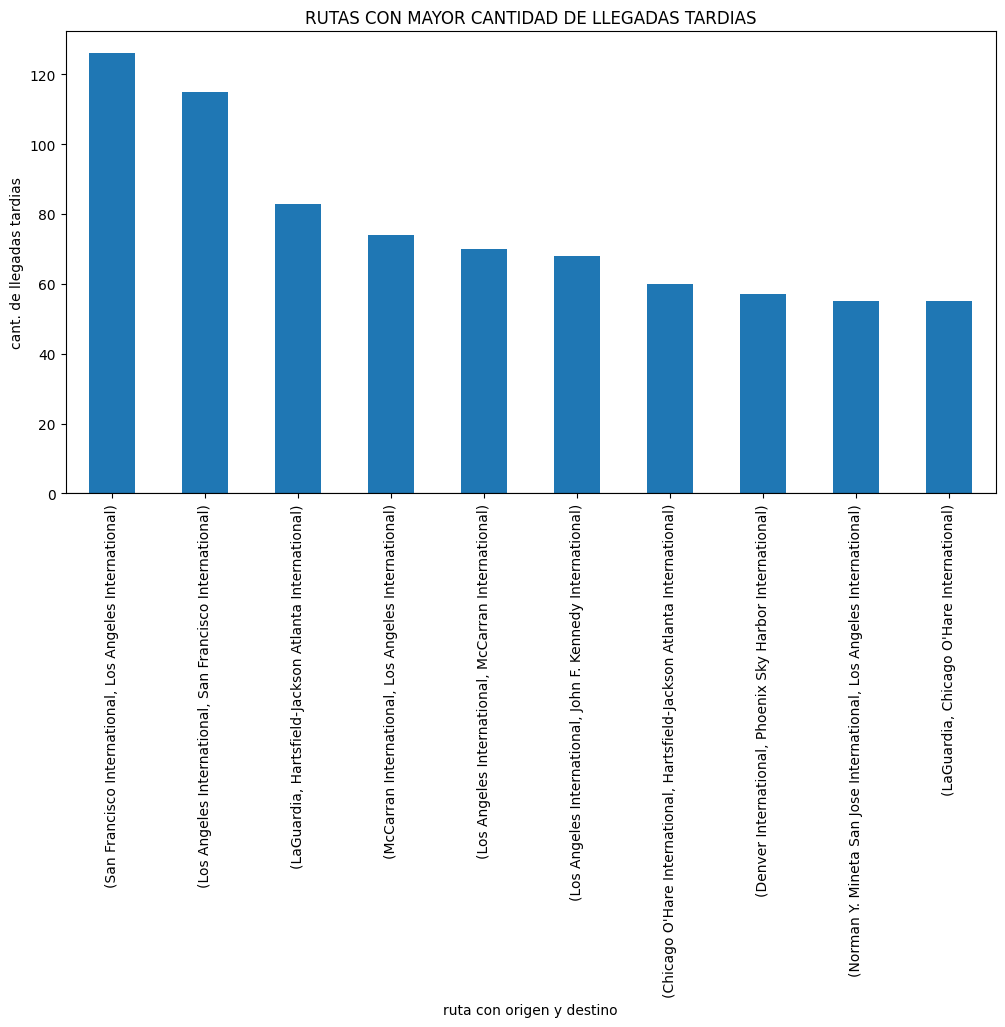

(('San Francisco International', 'Los Angeles International'), 126)

In [46]:
late_arrivals = df_cleaned[df_cleaned['ArrDel15'] == 1]
route_late_arrivals = late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
route_late_arrivals.head(10).plot(kind='bar')
plt.title('RUTAS CON MAYOR CANTIDAD DE LLEGADAS TARDIAS')
plt.xlabel('ruta con origen y destino')
plt.ylabel('cant. de llegadas tardias')
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

top_route_late = route_late_arrivals.idxmax(), route_late_arrivals.max()
top_route_late

Which route has the highest average arrival delay?

R= calculamos de nuevo generando las rutas entre origen y destino, pero esta vez no nos importa tanto cuantas veces se retraso la ruta en el periodo, si no cuanto tiempo en promedio se avienta de retraso cada vez que eso ocurre, es decir, el vuelo con el potencial para llegar MAS TARDE, no necesariamente que llegue con retraso de manera frecuenta. Obtenemos que el promedio mas alto es 25 minutos para new orleans a washington

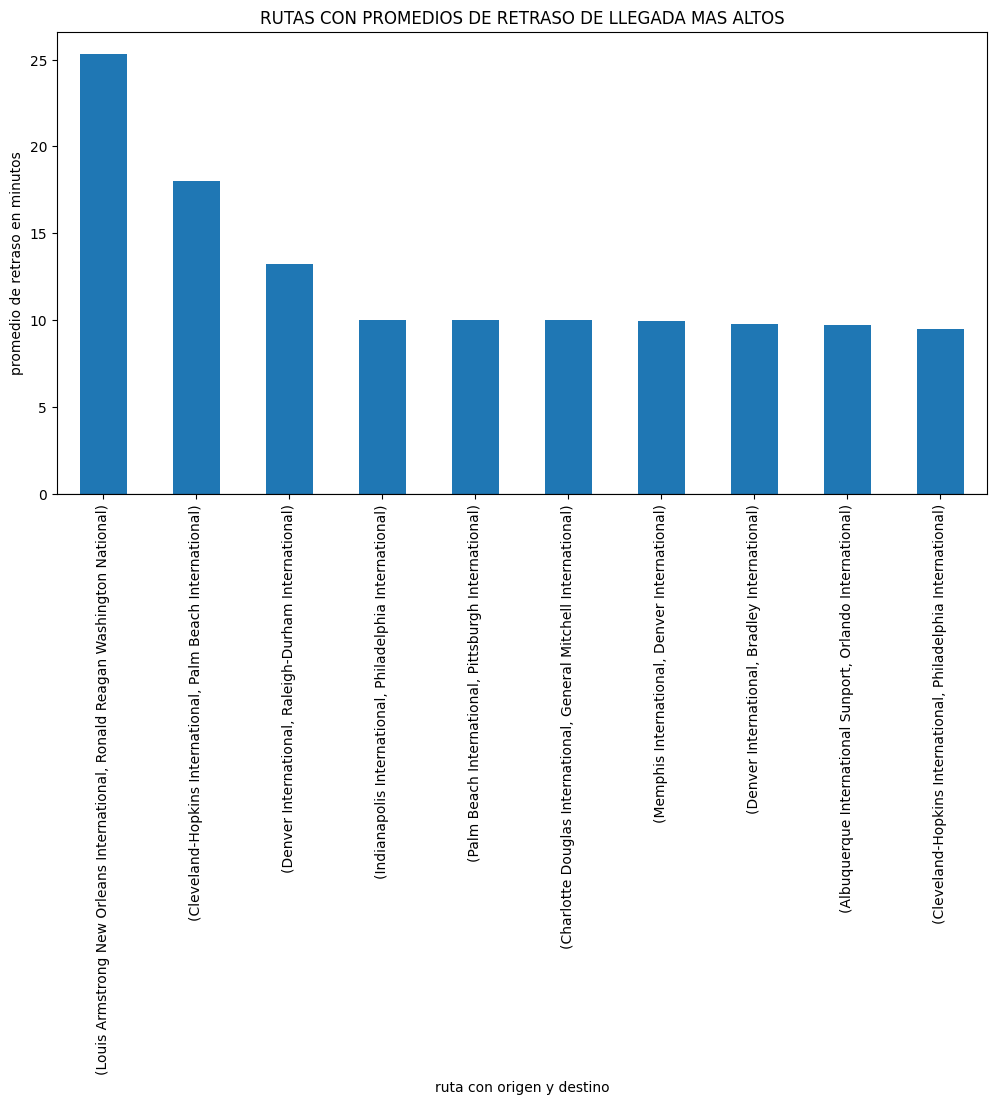

(('Louis Armstrong New Orleans International',
  'Ronald Reagan Washington National'),
 25.333333333333332)

In [47]:
route_arrival_delay = df_cleaned.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
route_arrival_delay.head(10).plot(kind='bar')
plt.title('RUTAS CON PROMEDIOS DE RETRASO DE LLEGADA MAS ALTOS')
plt.xlabel('ruta con origen y destino')
plt.ylabel('promedio de retraso en minutos')
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()

top_route_delay = route_arrival_delay.idxmax(), route_arrival_delay.max()
top_route_delay